In [1]:
%%time
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.ops import transform

from shapely.geometry import Point, Polygon
import datetime

from io import StringIO
from pathlib import Path, PureWindowsPath
import os
import sys
from functools import partial

# Import custom functions from `scripts` folder
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from scripts.clean_tweets import geometrize_tweets, convert_shapefile_crs, find_frequencies
from scripts.home_location import assign_home_location
from scripts.summary_stats import summary_stats

data_path = Path("C:/Users/emman/Box/Spring 2020/Displacement Studio/Datasets/")

Wall time: 1.01 s


# Purpose of the notebook: 

I want to see how different the distributions of SA2 to SA1 are within the Sydney Urban-Centers and Localities. This will also help me figure out how the typologies are generally distributed.

C:\Users\emman\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


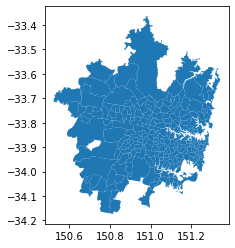

In [55]:
# Read Australia SA2 shapefiles
ucl_sa2 = gpd.read_file('C:/Users/emman/Box/Twitter data/Observation Shapefiles/syd.geojson')
#Crikey, our area is too big
ucl_sa2.plot()
# We also need to change the crs 
ucl_sa2.crs = {'init': 'epsg:4326'}

In [58]:
# Summary Statistics of Shapefiles
print(f"The UCL Boundaries using SA2 shapes take up {ucl_sa2.shape[0]} observations while the average kilometers squared takes up {ucl_sa2.AREASQKM16.mean():.2f} km squared and the total square kilometers of this area is {ucl_sa2.AREASQKM16.sum()} ")



The UCL Boundaries using SA2 shapes take up 265 observations while the average kilometers squared takes up 13.14 km squared and the total square kilometers of this area is 3482.7441 


In [59]:
ucl_sa2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   SA2_MAIN16          265 non-null    object  
 1   SA2_5DIG16          265 non-null    object  
 2   SA2_NAME16          265 non-null    object  
 3   SA3_CODE16          265 non-null    object  
 4   SA3_NAME16          265 non-null    object  
 5   SA4_CODE16          265 non-null    object  
 6   SA4_NAME16          265 non-null    object  
 7   GCC_CODE16          265 non-null    object  
 8   GCC_NAME16          265 non-null    object  
 9   STE_CODE16          265 non-null    object  
 10  STE_NAME16          265 non-null    object  
 11  AREASQKM16          265 non-null    float64 
 12  OID                 265 non-null    int64   
 13  SA2_MAINCODE_2016   265 non-null    int64   
 14  rentals_ov100_11    265 non-null    int64   
 15  types               265 non-null

In [71]:
# Read Australia SA2 shapefiles
sa1_shp = gpd.read_file('C:\\Users\\emman\\box\\Spring 2020\\Displacement Studio\\Shared 228 Sydney Folder\\Sa1 Shapefiles\\SA1_2016_AUST.dbf')


<AxesSubplot:>

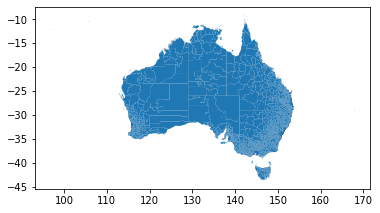

In [6]:
sa1_shp.plot()

In [9]:
sa1_shp.shape

(57523, 15)

<AxesSubplot:>

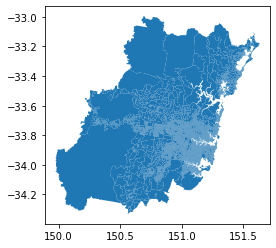

In [17]:
sa1_shp.plot()

In [72]:
sa1_shp = sa1_shp[['SA1_MAIN16','SA1_7DIG16','SA2_MAIN16','geometry','AREASQKM16']]
sa2_shp = ucl_sa2[['SA2_MAIN16','Typology_ID','standardized_types','types']]

In [73]:
sa1_merge = sa1_shp.merge(sa2_shp, on='SA2_MAIN16')

In [74]:
sa1_merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10053 entries, 0 to 10052
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   SA1_MAIN16          10053 non-null  object  
 1   SA1_7DIG16          10053 non-null  object  
 2   SA2_MAIN16          10053 non-null  object  
 3   geometry            10053 non-null  geometry
 4   AREASQKM16          10053 non-null  float64 
 5   Typology_ID         10053 non-null  object  
 6   standardized_types  10053 non-null  object  
 7   types               10053 non-null  int64   
dtypes: float64(1), geometry(1), int64(1), object(5)
memory usage: 706.9+ KB


In [76]:
print(f"""The UCL Boundaries using SA2 shapes take up {sa1_merge.shape[0]} observations while the average kilometers squared takes up {sa1_merge.AREASQKM16.mean():.2f} km squared and the total square kilometers of this area is {sa1_merge.AREASQKM16.sum()}  """)

The UCL Boundaries using SA2 shapes take up 10053 observations while the average kilometers squared takes up 0.35 km squared and the total square kilometers of this area is 3482.7441  


<AxesSubplot:>

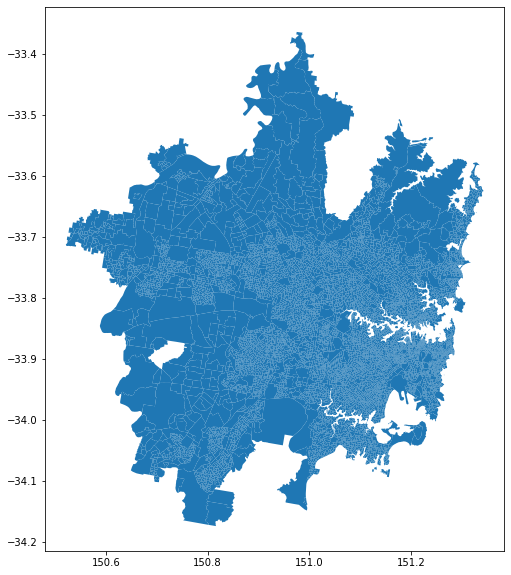

In [75]:
sa1_merge.plot(figsize=(14,10))

Text(0.5, 1.0, 'Typologies')

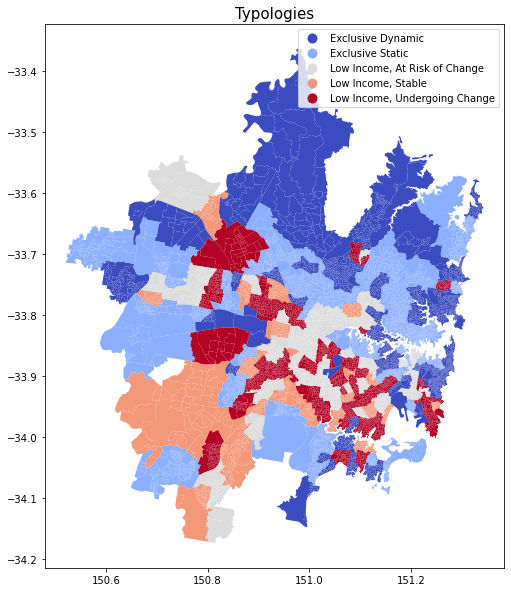

In [68]:
figure, ax = plt.subplots(figsize=(12,10))
base = sa1_merge.plot(column="standardized_types", legend=True, ax=ax, cmap="coolwarm")
ax.set_title("Typologies", fontdict={'fontsize':15})

